1. Scrap Data

In [1]:
!pip install vnstock

In [2]:
conda install -c conda-forge ta-lib

Retrieving notices: ...working... done
| / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
from datetime import datetime
from vnstock import *

In [4]:
usdindex = pd.read_csv('/kaggle/input/currency/usdindex.csv')
usd_vnd = pd.read_csv('/kaggle/input/currency/USD_VND Historical Data.csv')

In [5]:
usd_vnd = usd_vnd.rename({'Date':'time'},axis=1)
usdindex = usdindex.rename({'Date':'time'},axis=1)
usd_vnd.head()

,time,Price,Open,High,Low,Vol.,Change %
0,05/06/2024,"25,390.5","25,390.0","25,415.0","25,360.0",NaN,-0.09%
1,05/03/2024,"25,412.5","25,415.0","25,420.0","25,410.0",NaN,0.09%
2,05/02/2024,"25,390.0","25,360.0","25,405.0","25,320.0",NaN,0.24%
3,04/26/2024,"25,330.0","25,355.0","25,375.0","25,317.5",NaN,-0.08%
4,04/25/2024,"25,350.0","25,395.0","25,445.0","25,315.0",NaN,-0.22%


In [6]:
listing_companies(live=True)

,ticker,organName,organTypeCode,comGroupCode
0,A32,CTCP 32,1,UPCOM
1,AAA,CTCP Nhựa An Phát Xanh,1,HOSE
2,AAH,CTCP Hợp Nhất,1,UPCOM
3,AAM,CTCP Thủy sản MeKong,1,HOSE
4,AAS,CTCP Chứng khoán SmartInvest,4,UPCOM
...,...,...,...,...
1746,YBC,CTCP Xi măng và Khoáng sản Yên Bái,1,UPCOM
1747,YBM,CTCP Khoáng sản Công nghiệp Yên Bái,1,HOSE
1748,YEG,CTCP Tập đoàn Yeah1,1,HOSE
1749,YSVN,Công ty TNHH Chứng khoán Yuanta Việt Nam,4,OTC


In [7]:
df = stock_historical_data(symbol="VNM", start_date="2014-01-01", end_date="2024-05-06", resolution="1D", type="stock", beautify=True, decor=False, source='TCBS')
vn30 = stock_historical_data("VNINDEX", "2014-01-01", "2024-05-06", "1D", "index", source='TCBS')

Time range is 3778 days. Looping through 11 requests
Time range is 3778 days. Looping through 11 requests


In [8]:
df

,time,open,high,low,close,volume,ticker
41,2014-01-02,35950,36490,35950,35950,32520,VNM
42,2014-01-03,35950,36220,35950,36220,30700,VNM
43,2014-01-06,35950,36220,35950,36220,77090,VNM
44,2014-01-07,36220,36220,35950,35950,105870,VNM
45,2014-01-08,35950,36220,35950,36220,38900,VNM
...,...,...,...,...,...,...,...
2623,2024-04-25,64000,64800,63900,64700,1918445,VNM
2624,2024-04-26,64700,65800,64500,65000,2944790,VNM
2625,2024-05-02,65400,65500,64900,65400,2566088,VNM
2626,2024-05-03,65600,66000,65500,65600,1969178,VNM


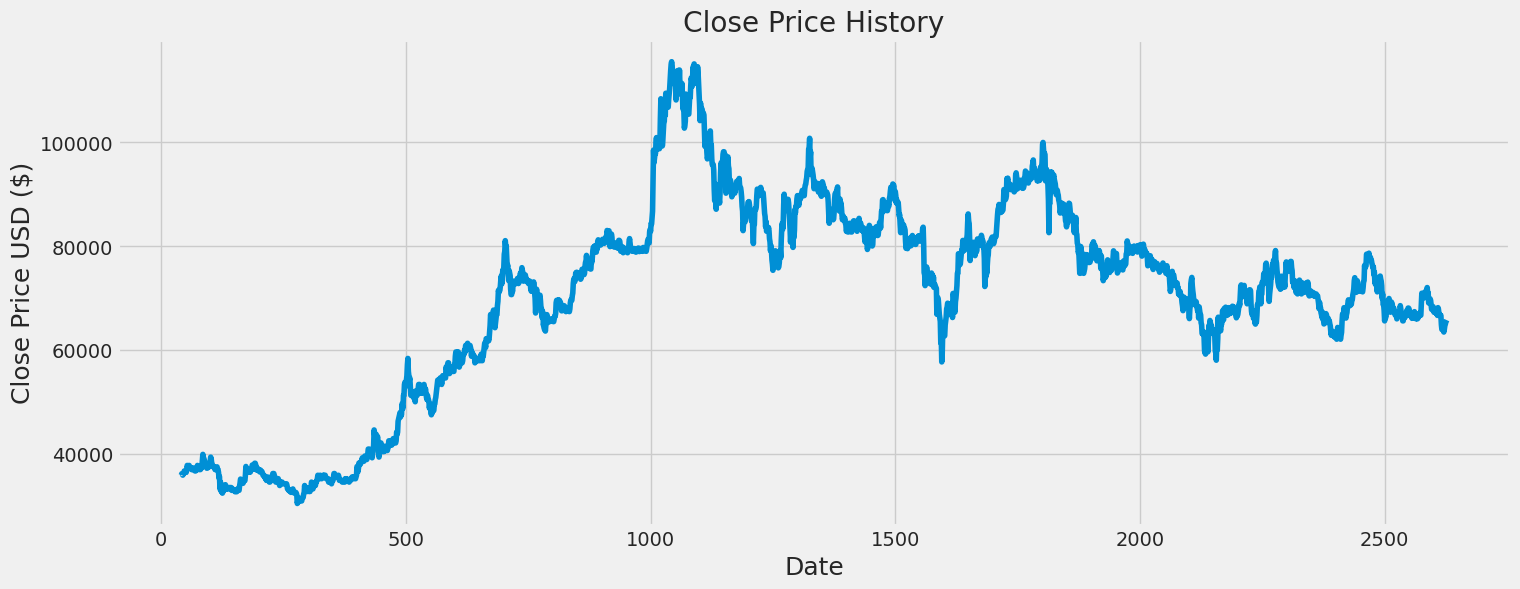

In [9]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [10]:
import pandas as pd
import talib


# Calculate Moving Average (MA) with a window of 5
df['MA_5'] = talib.SMA(df['close'], timeperiod=5)

# Calculate Relative Strength Index (RSI) with a window of 14
df['RSI_14'] = talib.RSI(df['close'], timeperiod=14)

# Calculate Stochastic Oscillator
df['%K'], df['%D'] = talib.STOCH(df['high'], df['low'], df['close'])

# Calculate Moving Average Convergence Divergence (MACD)
macd, signal, _ = talib.MACD(df['close'])
df['MACD'] = macd
df['MACD_Signal'] = signal

# Calculate Bollinger Bands
upper_band, middle_band, lower_band = talib.BBANDS(df['close'])
df['Upper_Band'] = upper_band
df['Middle_Band'] = middle_band
df['Lower_Band'] = lower_band

# Calculate Average True Range (ATR) with a window of 14
df['ATR_14'] = talib.ATR(df['high'], df['low'], df['close'], timeperiod=14)

# Calculate On-Balance Volume (OBV)
df['OBV'] = talib.OBV(df['close'], df['volume'])

# Print the DataFrame with the calculated indicators
print(df)

            time   open   high    low  close   volume ticker     MA_5  \
41    2014-01-02  35950  36490  35950  35950    32520    VNM      NaN   
42    2014-01-03  35950  36220  35950  36220    30700    VNM      NaN   
43    2014-01-06  35950  36220  35950  36220    77090    VNM      NaN   
44    2014-01-07  36220  36220  35950  35950   105870    VNM      NaN   
45    2014-01-08  35950  36220  35950  36220    38900    VNM  36112.0   
...          ...    ...    ...    ...    ...      ...    ...      ...   
2623  2024-04-25  64000  64800  63900  64700  1918445    VNM  64080.0   
2624  2024-04-26  64700  65800  64500  65000  2944790    VNM  64240.0   
2625  2024-05-02  65400  65500  64900  65400  2566088    VNM  64520.0   
2626  2024-05-03  65600  66000  65500  65600  1969178    VNM  64940.0   
2627  2024-05-06  65800  66400  65500  65800  2261300    VNM  65300.0   

         RSI_14         %K         %D         MACD  MACD_Signal    Upper_Band  \
41          NaN        NaN        NaN     

In [11]:
df['time'] = pd.to_datetime(df['time'])
usdindex['time'] = pd.to_datetime(usdindex['time'])
usd_vnd['time'] = pd.to_datetime(usd_vnd['time'])

In [12]:
usdindex = usdindex.rename({'Close':'usdindex_close'},axis=1)
data = pd.merge(df, usdindex[['time','usdindex_close']], on = 'time', how = 'left')
usd_vnd =usd_vnd.rename({'Price':'usd_vnd_price'},axis=1)
data = pd.merge(data, usd_vnd[['time','usd_vnd_price']], on = 'time', how = 'left')

In [13]:
data

,time,open,high,low,close,volume,ticker,MA_5,RSI_14,%K,%D,MACD,MACD_Signal,Upper_Band,Middle_Band,Lower_Band,ATR_14,OBV,usdindex_close,usd_vnd_price
0,2014-01-02,35950,36490,35950,35950,32520,VNM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32520.0,80.629997,"21,110.0"
1,2014-01-03,35950,36220,35950,36220,30700,VNM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63220.0,80.790001,"21,095.0"
2,2014-01-06,35950,36220,35950,36220,77090,VNM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63220.0,80.650002,"21,100.0"
3,2014-01-07,36220,36220,35950,35950,105870,VNM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-42650.0,80.830002,"21,095.0"
4,2014-01-08,35950,36220,35950,36220,38900,VNM,36112.0,NaN,NaN,NaN,NaN,NaN,36376.544892,36112.0,35847.455108,NaN,-3750.0,81.040001,"21,100.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2582,2024-04-25,64000,64800,63900,64700,1918445,VNM,64080.0,38.503491,43.754313,32.906532,-1139.613220,-991.709973,64853.563184,64080.0,63306.436816,998.617873,-57819349.0,105.599998,"25,350.0"
2583,2024-04-26,64700,65800,64500,65000,2944790,VNM,64240.0,41.263990,59.584860,44.097657,-1052.784664,-1003.924911,65317.775487,64240.0,63162.224513,1020.145168,-54874559.0,105.940002,"25,330.0"
2584,2024-05-02,65400,65500,64900,65400,2566088,VNM,64520.0,44.820610,75.091575,59.476916,-940.850216,-991.309972,65890.547336,64520.0,63149.452664,990.134798,-52308471.0,105.300003,"25,390.0"
2585,2024-05-03,65600,66000,65500,65600,1969178,VNM,64940.0,46.562940,79.282051,71.319495,-826.475930,-958.343164,66068.538878,64940.0,63811.461122,962.268027,-50339293.0,NaN,"25,412.5"


2. EDA and Data Cleaning

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   time            2587 non-null   datetime64[ns]
 1   open            2587 non-null   int64         
 2   high            2587 non-null   int64         
 3   low             2587 non-null   int64         
 4   close           2587 non-null   int64         
 5   volume          2587 non-null   int64         
 6   ticker          2587 non-null   object        
 7   MA_5            2583 non-null   float64       
 8   RSI_14          2573 non-null   float64       
 9   %K              2579 non-null   float64       
 10  %D              2579 non-null   float64       
 11  MACD            2554 non-null   float64       
 12  MACD_Signal     2554 non-null   float64       
 13  Upper_Band      2583 non-null   float64       
 14  Middle_Band     2583 non-null   float64       
 15  Lowe

In [15]:
data.isna().sum()/len(data)

time              0.000000
open              0.000000
high              0.000000
low               0.000000
close             0.000000
volume            0.000000
ticker            0.000000
MA_5              0.001546
RSI_14            0.005412
%K                0.003092
%D                0.003092
MACD              0.012756
MACD_Signal       0.012756
Upper_Band        0.001546
Middle_Band       0.001546
Lower_Band        0.001546
ATR_14            0.005412
OBV               0.000000
usdindex_close    0.030924
usd_vnd_price     0.000000
dtype: float64

In [16]:
data = data.ffill().bfill()

In [17]:
data.isna().sum()

time              0
open              0
high              0
low               0
close             0
volume            0
ticker            0
MA_5              0
RSI_14            0
%K                0
%D                0
MACD              0
MACD_Signal       0
Upper_Band        0
Middle_Band       0
Lower_Band        0
ATR_14            0
OBV               0
usdindex_close    0
usd_vnd_price     0
dtype: int64

In [18]:
data.set_index('time',inplace=True)
data.drop(columns=['ticker'],inplace=True)
data = data.replace(',', '', regex=True).astype(float)
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

2070

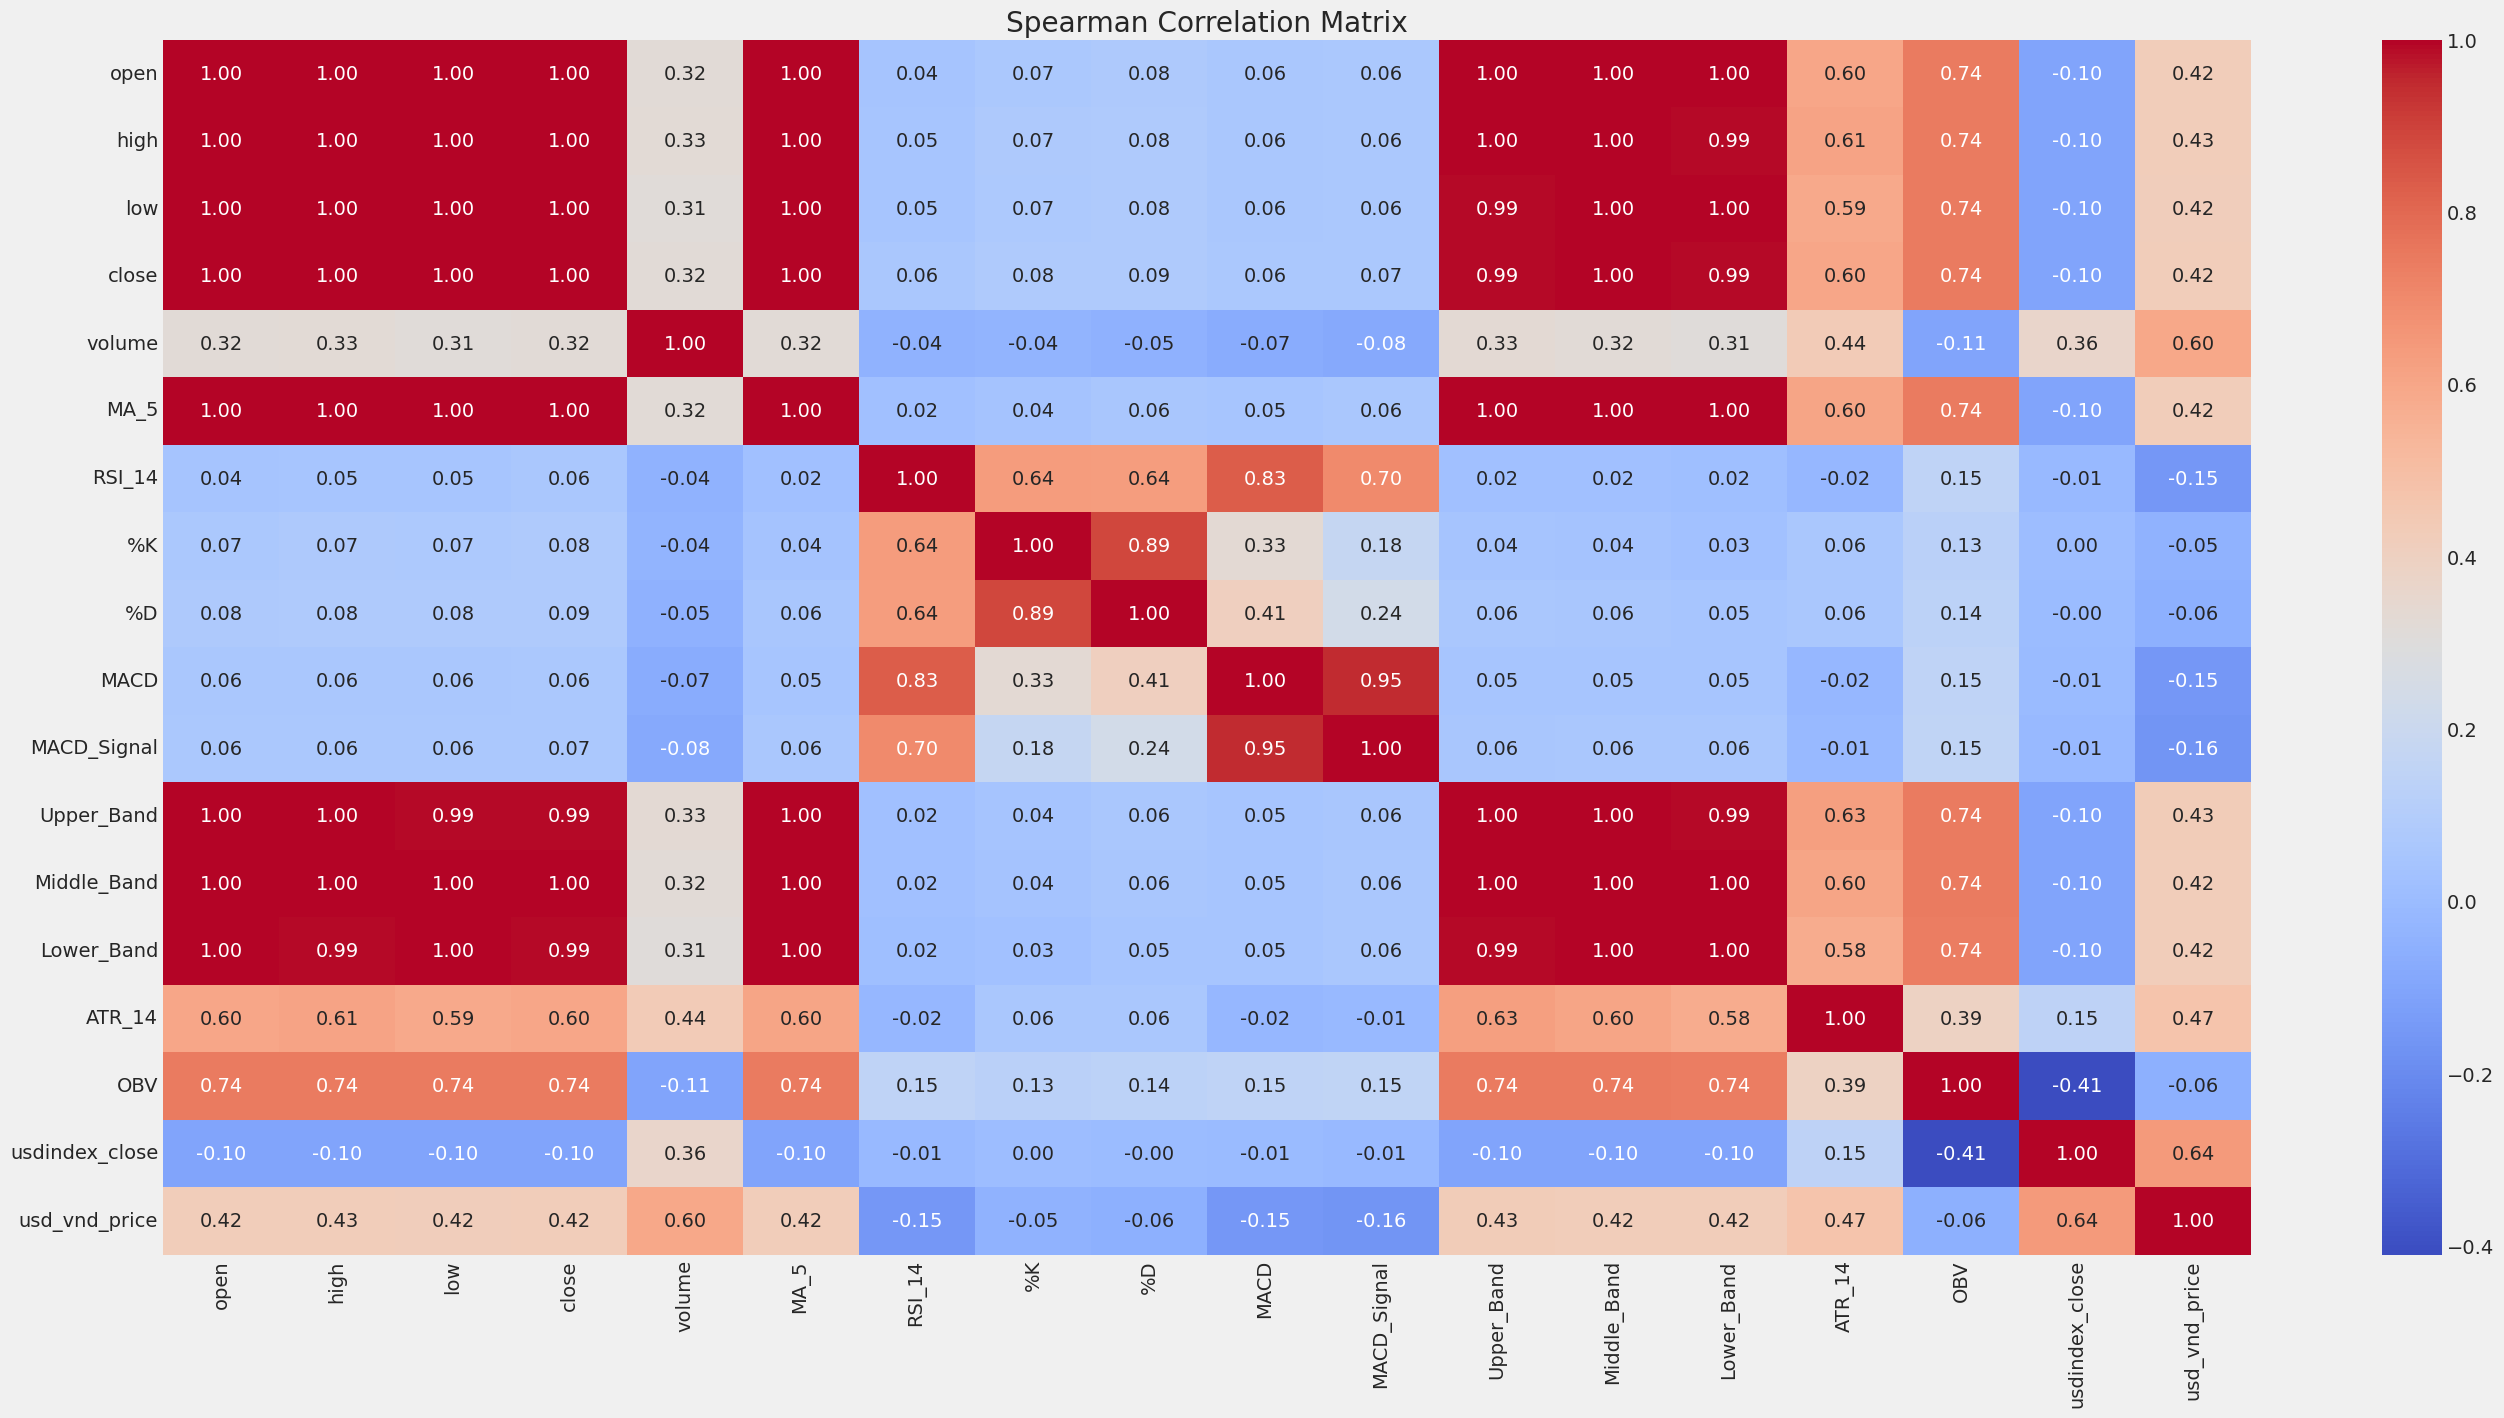

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Spearman correlation matrix
correlation_matrix = data.corr(method='spearman')

# Plot correlation matrix
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Matrix")
plt.show()

In [20]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

# Assuming X is your feature matrix and y is your target variable

# Initialize SelectKBest with Fischer Score (chi2) as the scoring function
selector = SelectKBest(score_func=f_regression, k='all')

# Fit selector to your data

selector.fit(data.drop(columns=['close']), data['close'])

# Get the Fischer scores and p-values for each feature
fischer_scores = selector.scores_
p_values = selector.pvalues_

# Optionally, you can also get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)


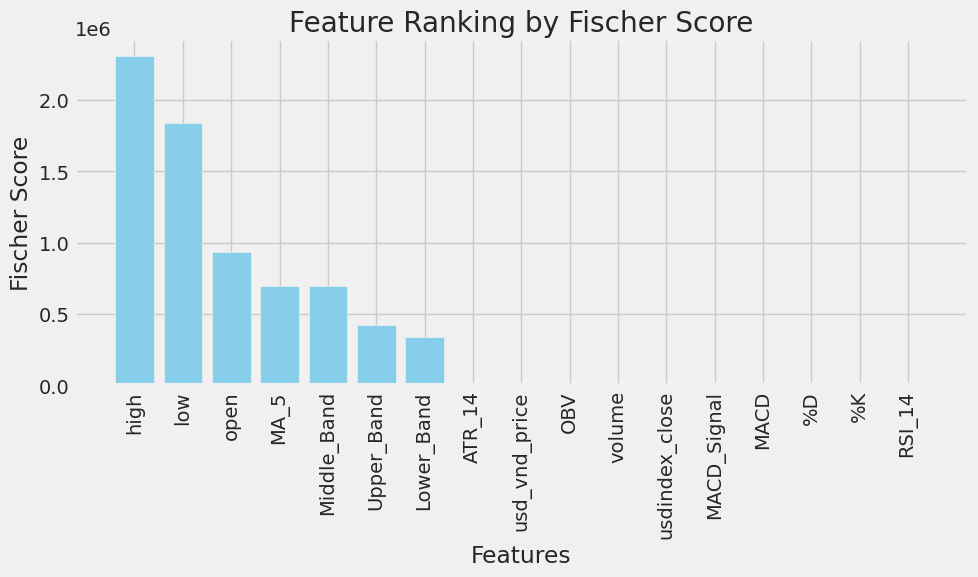

In [21]:
# Sort features based on Fischer scores
sorted_indices = np.argsort(fischer_scores)[::-1]  # Sort in descending order
sorted_scores = fischer_scores[sorted_indices]
feature_names = data.drop(columns=['close']).columns
sorted_features = np.array(feature_names)[sorted_indices]  # Assuming you have feature names

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_scores)), sorted_scores, color='skyblue')
plt.xticks(range(len(sorted_scores)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Fischer Score')
plt.title('Feature Ranking by Fischer Score')
plt.tight_layout()
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.06430338, 0.06506081, 0.06487643, ..., 0.43548056, 0.04260789,
        0.01137656],
       [0.06430338, 0.06187271, 0.06487643, ..., 0.43563914, 0.04718335,
        0.00796359],
       [0.06430338, 0.06187271, 0.06487643, ..., 0.43563914, 0.04317995,
        0.00910125],
       ...,
       [0.41114121, 0.4076042 , 0.40886407, ..., 0.16511173, 0.74806985,
        0.98521047],
       [0.41349664, 0.41350809, 0.41599335, ..., 0.17528357, 0.74806985,
        0.99032992],
       [0.41585208, 0.4182312 , 0.41599335, ..., 0.18696438, 0.74309404,
        0.98532423]])

In [23]:
scaled_data.shape

(2587, 18)

Split Data

In [24]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :])  # Slice entire features (all columns)
    y_train.append(train_data[i, 3]) 
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train to include all features
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], train_data.shape[1]))

[array([[0.06430338, 0.06506081, 0.06487643, ..., 0.43548056, 0.04260789,
        0.01137656],
       [0.06430338, 0.06187271, 0.06487643, ..., 0.43563914, 0.04718335,
        0.00796359],
       [0.06430338, 0.06187271, 0.06487643, ..., 0.43563914, 0.04317995,
        0.00910125],
       ...,
       [0.08314686, 0.08076514, 0.08079848, ..., 0.44361942, 0.03088367,
        0.00796359],
       [0.08314686, 0.09021136, 0.08388783, ..., 0.44505182, 0.03803265,
        0.00739477],
       [0.0925686 , 0.09021136, 0.09018536, ..., 0.44690924, 0.03660277,
        0.00739477]])]
[0.10497237569060774]

[array([[0.06430338, 0.06506081, 0.06487643, ..., 0.43548056, 0.04260789,
        0.01137656],
       [0.06430338, 0.06187271, 0.06487643, ..., 0.43563914, 0.04718335,
        0.00796359],
       [0.06430338, 0.06187271, 0.06487643, ..., 0.43563914, 0.04317995,
        0.00910125],
       ...,
       [0.08314686, 0.08076514, 0.08079848, ..., 0.44361942, 0.03088367,
        0.00796359],
       [0

In [25]:
x_train.shape

(2010, 60, 18)

In [26]:
y_train.shape

(2010,)

3. Model Building

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=100)

2024-05-06 12:55:56.298331: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 12:55:56.298432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 12:55:56.439402: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0765
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.9672e-04
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.1127e-04
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.0266e-04
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.0794e-04
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.2983e-04
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6412e-04
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.5027e-04
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.8525e-04
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7030e-04
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.3223e-04
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.5810e-04
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.7942e-04
Epoch 15/100
32/32 ━━━

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        75,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378,971 (1.45 MB)

 Trainable params: 126,323 (493.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 252,648 (986.91 KB)

4. Evaluation

In [29]:
from sklearn.metrics import mean_absolute_error

test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, 3]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 18 ))

scaled = scaled_data

predictions = model.predict(x_test)

scaled[training_data_len:, 3] = predictions.flatten()
inverse_data = scaler.inverse_transform(scaled)
predictions = inverse_data[training_data_len:, 3]

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:", rmse)
# Calculate MAE
mae = mean_absolute_error(predictions, y_test)
print("MAE:", mae)

# Calculate MAPE
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("MAPE:", mape)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
RMSE: 1287.2410689406092
MAE: 981.6398302407745
MAPE: 1.4082930669691953


/tmp/ipykernel_24/2971678454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


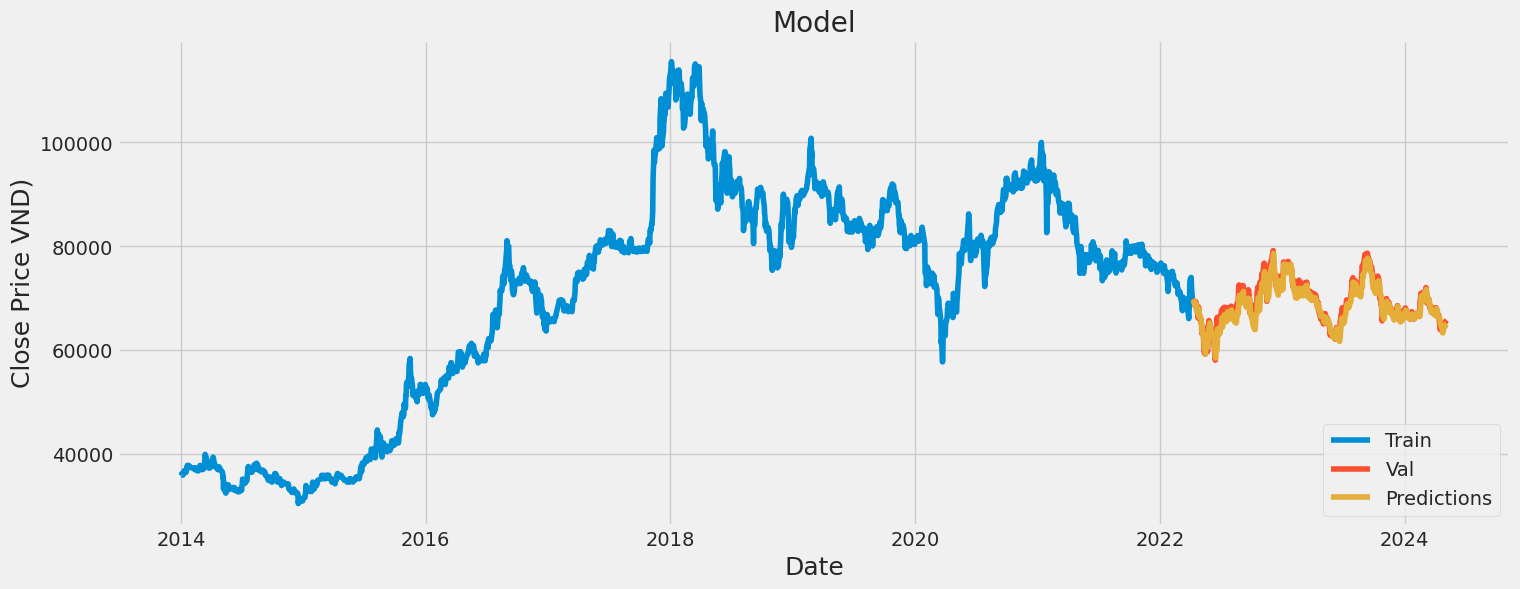

In [30]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price VND)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [31]:
features = data.columns
features

Index(['open', 'high', 'low', 'close', 'volume', 'MA_5', 'RSI_14', '%K', '%D',
       'MACD', 'MACD_Signal', 'Upper_Band', 'Middle_Band', 'Lower_Band',
       'ATR_14', 'OBV', 'usdindex_close', 'usd_vnd_price'],
      dtype='object')